# 심화 학습 : 커널 밀도 추정

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## KDE 등장 배경 : 히스토그램

In [2]:
def make_data(N, f = 0.3, rseed = 1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

In [3]:
x = make_data(1000)

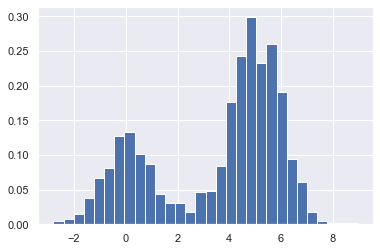

In [4]:
hist = plt.hist(x, bins = 30, density = True)

In [5]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

In [6]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

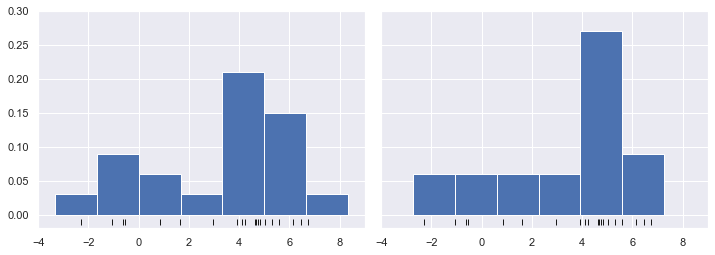

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharex = True, sharey = True, subplot_kw = {'xlim' : (-4, 9), 'ylim' : (-0.02, 0.3)})
fig.subplots_adjust(wspace = 0.05)

for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins = bins + offset, density = True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth = 1)

(-0.2, 8.0)

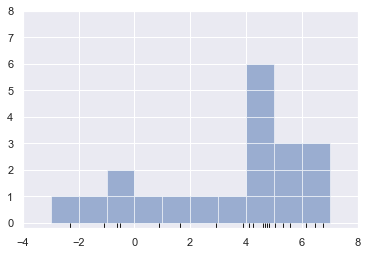

In [8]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth = 1)

for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha = 0.5))

ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

(-4.0, 8.0, -0.2, 8.0)

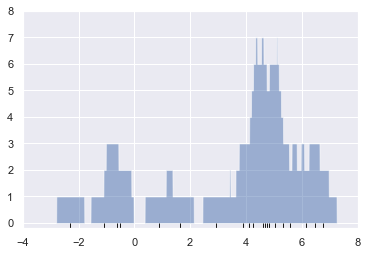

In [9]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha = 0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth = 1)

plt.axis([-4, 8, -0.2, 8])

(-4.0, 8.0, -0.2, 5.0)

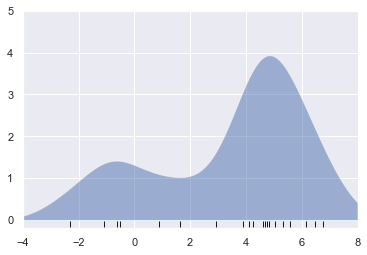

In [10]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha = 0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth = 1)

plt.axis([-4, 8, -0.2, 5])

## 커널 밀도 추정의 실제 적용

(-0.02, 0.22)

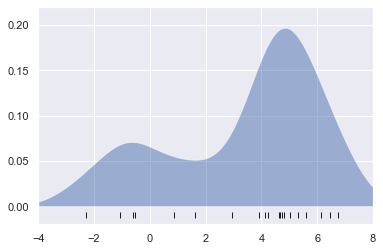

In [11]:
from sklearn.neighbors import KernelDensity

# KDE 모델 인스턴스화 및 적합
kde = KernelDensity(bandwidth = 1.0, kernel = 'gaussian')
kde.fit(x[:, None])

# score_samples는 확률 밀도의 로그를 반환함
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha = 0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth = 1)
plt.xlim(-4, 8)
plt.ylim(-0.02, 0.22)

### 교차 검증을 통한 대역폭 선택

In [12]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel = 'gaussian'), {'bandwidth' : bandwidths}, cv = LeaveOneOut())
grid.fit(x[:, None])

GridSearchCV(cv=LeaveOneOut(), estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.305385...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])})

In [13]:
grid.best_params_

{'bandwidth': 1.1233240329780276}

## 예제 : 구에 KDE 적용하기

In [14]:
from sklearn.datasets import fetch_species_distributions

data = fetch_species_distributions()

# 종 ID와 위치의 행렬/배열 가져오기
latlon = np.vstack([data.train['dd lat'], data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro') for d in data.train['species']], dtype = 'int')

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.species_distributions module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


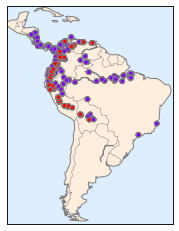

In [15]:
import os
os.environ["PROJ_LIB"] = "C:\Anaconda\Library\share"

from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids

xgrid, ygrid = construct_grids(data)

# Basemap으로 해안선 그리기
m = Basemap(projection = 'cyl', resolution = 'c', llcrnrlat = ygrid.min(), urcrnrlat = ygrid.max(),
                          llcrnrlon = xgrid.min(), urcrnrlon = xgrid.max())
m.drawmapboundary(fill_color = '#DDEEFF')
m.fillcontinents(color = '#FFEEDD')
m.drawcoastlines(color = 'gray', zorder = 2)
m.drawcountries(color = 'gray', zorder = 2)

# 위치 표시하기
m.scatter(latlon[:, 1], latlon[:, 0], zorder = 3, c = species, cmap = 'rainbow', latlon = True, edgecolor = 'gray', s = 20)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


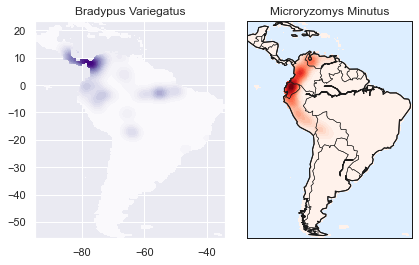

In [16]:
# 등고선 플롯을 위한 데이터 그리드 설정
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# 두 개의 플롯을 나란히 생성
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left = 0.05, right = 0.95, wspace = 0.05)
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
    axi.set_title(species_names[i])
    # Basemap으로 해안선 플로팅
    m = Basemap(projection = 'cyl',  llcrnrlat = Y.min(), urcrnrlat = Y.max(),
                              llcrnrlon = X.min(), urcrnrlon = X.max())
    m.drawmapboundary(fill_color = '#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()
    
    # 분포에 대한 구형 커널 밀도 추정 구성
    kde = KernelDensity(bandwidth = 0.03, metric = 'haversine')
    kde.fit(np.radians(latlon[species == i]))
    
    # 육지에 대해서만 평가 : -9999는 바다를 나타냄
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)
    
    # 밀도 등고선 그리기
    levels = np.linspace(0, Z.max(), 25)
    axi.contourf(X, Y, Z, levels = levels, cmap = cmaps[i])

## 예제 : 나이브하지 않은 베이즈(Not-So-Naive Bayes)

In [17]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KDEClassifier(BaseEstimator, ClassifierMixin):
    ''' KDE 기반 베이즈 생성 분류
    모수
    ---------
    대역폭 : 부동 소수점
            각 클래스 내 커널 대역폭
    커널 : 문자열
            KernelDensity에 전달할 커널 이름
    '''
    def __init__(self, bandwidth = 1.0, kernel = 'gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth = self.bandwidth, kernel = self.kernel).fit(Xi) for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0]) for Xi in training_sets]
        return self
    
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X) for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims = True)
    
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

### 맞춤 추정기 사용하기

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

digits = load_digits()

bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth' : bandwidths})
grid.fit(digits.data, digits.target)
scores = [test for test in grid.cv_results_['mean_test_score']]

{'bandwidth': 6.135907273413174}
accuracy = 0.9677298050139276


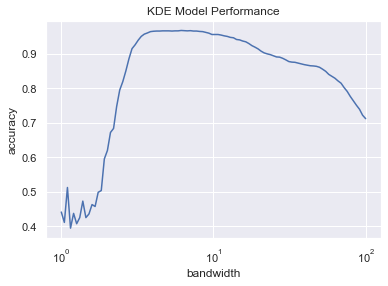

In [19]:
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')
print(grid.best_params_)
print('accuracy =', grid.best_score_)

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), digits.data, digits.target).mean()

0.8069281956050759